Thư viện

In [1]:
# Thư viện
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from tensorflow import keras
import tensorflow as tf
from imutils import paths
import math
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
%matplotlib inline

Tải dữ liệu csv

In [2]:
import pandas as pd

# Tải tệp csv
file_path = r"D:\projects\Automatic_Driving_System\Data\driving_log.csv"
data = pd.read_csv(file_path)
data.head(5)

,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_106.jpg,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_106.jpg,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_106.jpg,0,0.1,0.2,8.054334E-06
0,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,0.0,0.0,0.0,0.000006
1,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,0.0,0.0,0.0,0.000007
2,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,0.0,0.0,0.0,0.000033
3,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,0.0,0.0,0.0,0.000004
4,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,D:\projects\Automatic_Driving_System\beta_simu...,0.0,0.0,0.0,0.000004


Gán tên cho các cột

In [3]:
# Gán tên mới cho các cột
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data.columns = columns

# Điều chỉnh độ rộng tối đa cho hiển thị của mỗi cột
# Điều chỉnh độ rộng tối đa là 100
pd.set_option('display.max_colwidth', 100)  # Hoặc một số lớn khác

data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_17...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_1...,0.0,0.0,0.0,0.000006
1,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_24...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_2...,0.0,0.0,0.0,0.000007
2,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_31...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_3...,0.0,0.0,0.0,0.000033
3,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_38...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_3...,0.0,0.0,0.0,0.000004
4,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\center_2023_12_16_00_52_42_...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\left_2023_12_16_00_52_42_45...,D:\projects\Automatic_Driving_System\beta_simulator_windows\Data\IMG\right_2023_12_16_00_52_42_4...,0.0,0.0,0.0,0.000004


Loại bỏ đường dẫn tệp

In [4]:
# Hàm để lấy tên tệp từ đường dẫn đầy đủ
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

# Áp dụng hàm này cho các cột 'center', 'left', 'right'
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

# Hiển thị 5 dòng đầu tiên để kiểm tra
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2023_12_16_00_52_42_176.jpg,left_2023_12_16_00_52_42_176.jpg,right_2023_12_16_00_52_42_176.jpg,0.0,0.0,0.0,0.000006
1,center_2023_12_16_00_52_42_246.jpg,left_2023_12_16_00_52_42_246.jpg,right_2023_12_16_00_52_42_246.jpg,0.0,0.0,0.0,0.000007
2,center_2023_12_16_00_52_42_317.jpg,left_2023_12_16_00_52_42_317.jpg,right_2023_12_16_00_52_42_317.jpg,0.0,0.0,0.0,0.000033
3,center_2023_12_16_00_52_42_388.jpg,left_2023_12_16_00_52_42_388.jpg,right_2023_12_16_00_52_42_388.jpg,0.0,0.0,0.0,0.000004
4,center_2023_12_16_00_52_42_459.jpg,left_2023_12_16_00_52_42_459.jpg,right_2023_12_16_00_52_42_459.jpg,0.0,0.0,0.0,0.000004


Biểu đồ hiển thị số lượng bins và mẫu mỗi bin

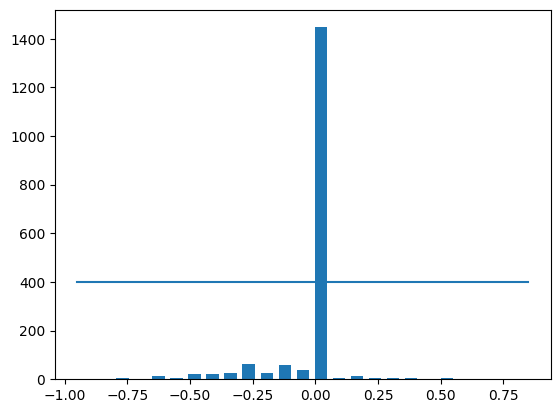

In [5]:
# Thiết lập số lượng bins và mẫu mỗi bin
num_bins = 25
samples_per_bin = 400

# Tính toán histogram
hist, bins = np.histogram(data['steering'], num_bins)

# Tính toán trung tâm của mỗi bin
center = (bins[:-1] + bins[1:]) * 0.5

# Vẽ biểu đồ bar
plt.bar(center, hist, width=0.05)

# Vẽ một đường ngang tại mức samples_per_bin
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

# Hiển thị biểu đồ
plt.show()

In [6]:
print('total data:', len(data))
data.shape

total data: 1781


(1781, 7)

Giảm số lượng mẫu trong mỗi "bin"

In [7]:
# Giảm số lượng mẫu trong mỗi "bin" (khoảng giá trị) của histogram xuống một ngưỡng cụ thể
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if bins[j] <= data['steering'].iloc[i] < bins[j+1]:
            list_.append(i)
    shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 1047
remaining: 734


Biểu đồ sau khi giảm số lượng mẫu

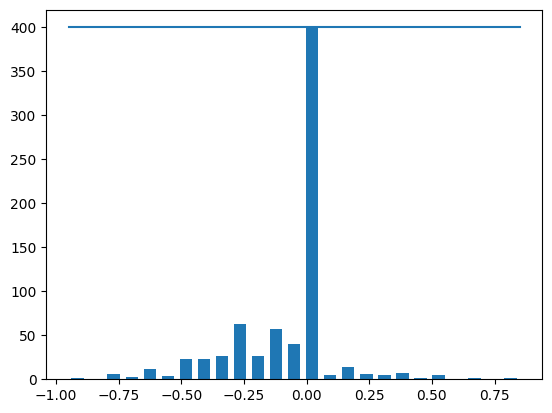

In [8]:
# Tính toán histogram mới
hist, bins = np.histogram(data['steering'], num_bins)

# Tính toán trung tâm của mỗi bin
center = (bins[:-1] + bins[1:]) * 0.5

# Vẽ biểu đồ bar cho histogram
plt.bar(center, hist, width=0.05)

# Vẽ một đường ngang tại mức samples_per_bin
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

# Hiển thị biểu đồ
plt.show()

Tạo ra hai danh sách: “image_paths” và “steerings”. 

In [9]:
# Tạo ra hai danh sách: “image_paths” và “steerings”. 
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        # left image append
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.15)
        # right image append
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

Gán đường dẫn vào tệp IMG

In [10]:
datadir = r"D:\projects\Automatic_Driving_System\Data"
# Tạo dữ liệu hình ảnh và giá trị lái
image_paths, steerings = load_img_steering(datadir + '\IMG', data)

C:\Users\HELLO\AppData\Local\Temp\ipykernel_16328\853797113.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\HELLO\AppData\Local\Temp\ipykernel_16328\853797113.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\HELLO\AppData\Local\Temp\ipykernel_16328\853797113.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [11]:
image_paths

array(['D:\\projects\\Automatic_Driving_System\\Data\\IMG\\center_2023_12_16_00_52_42_176.jpg',
       'D:\\projects\\Automatic_Driving_System\\Data\\IMG\\left_2023_12_16_00_52_42_176.jpg',
       'D:\\projects\\Automatic_Driving_System\\Data\\IMG\\right_2023_12_16_00_52_42_176.jpg',
       ...,
       'D:\\projects\\Automatic_Driving_System\\Data\\IMG\\center_2023_12_16_00_54_43_140.jpg',
       'D:\\projects\\Automatic_Driving_System\\Data\\IMG\\left_2023_12_16_00_54_43_140.jpg',
       'D:\\projects\\Automatic_Driving_System\\Data\\IMG\\right_2023_12_16_00_54_43_140.jpg'],
      dtype='<U80')

In [12]:
steerings

array([ 0.  ,  0.15, -0.15, ..., -0.25, -0.1 , -0.4 ])

Hiện ảnh

Tải thành công 10 ảnh từ D:\projects\Automatic_Driving_System\Data\lane_line_images


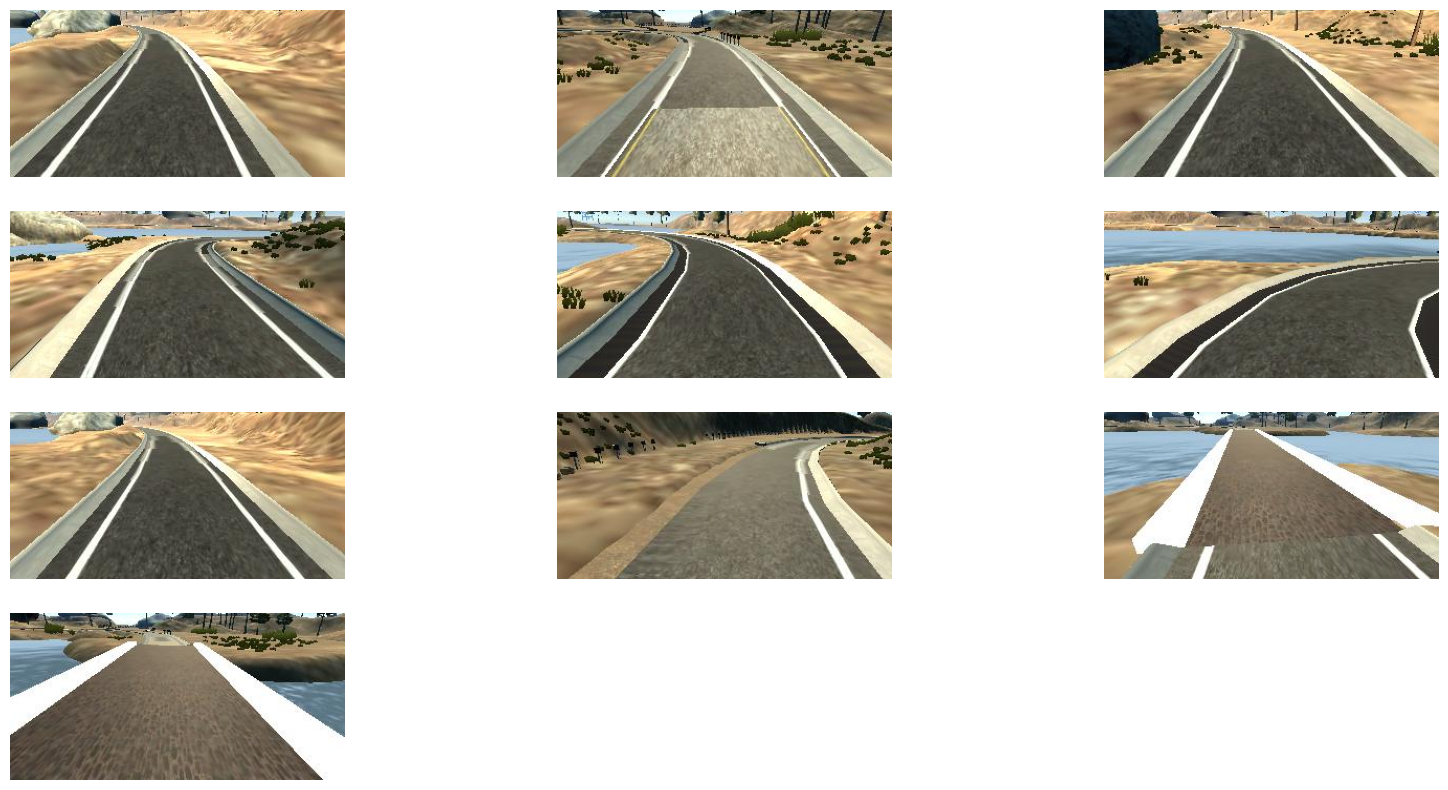

In [47]:
folder_path = r"D:\projects\Automatic_Driving_System\Data\lane_line_images"

if os.path.exists(folder_path):
    image_paths = [os.path.join(folder_path, filename) 
                   for filename in os.listdir(folder_path) 
                   if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

    images = [cv2.imread(path) for path in image_paths]

    if images:
        print(f"Tải thành công {len(images)} ảnh từ {folder_path}")

        def show_images(images, cmap="viridis"):
            column = 3
            row = int(math.ceil(len(images)/column))
            plt.figure(figsize=(20, 10))
            for i, img in enumerate(images):
                plt.subplot(row, column, i + 1)
                if cmap != "gray":
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img, cmap=cmap)
                plt.axis('off')

        show_images(images)

    else:
        print(f"Không tìm thấy ảnh trong {folder_path}")
else:
    print(f"Thư mục {folder_path} không tồn tại")

Hiện ảnh

In [48]:
def show_images(images, cmap="viridis"):
    column = 3
    row = int(math.ceil(len(images)/column))
    plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(row,column,i+1)
        if cmap != "gray":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap=cmap)
        plt.axis('off')

Tiền xử lý ảnh

Chuyển ảnh thành màu xám

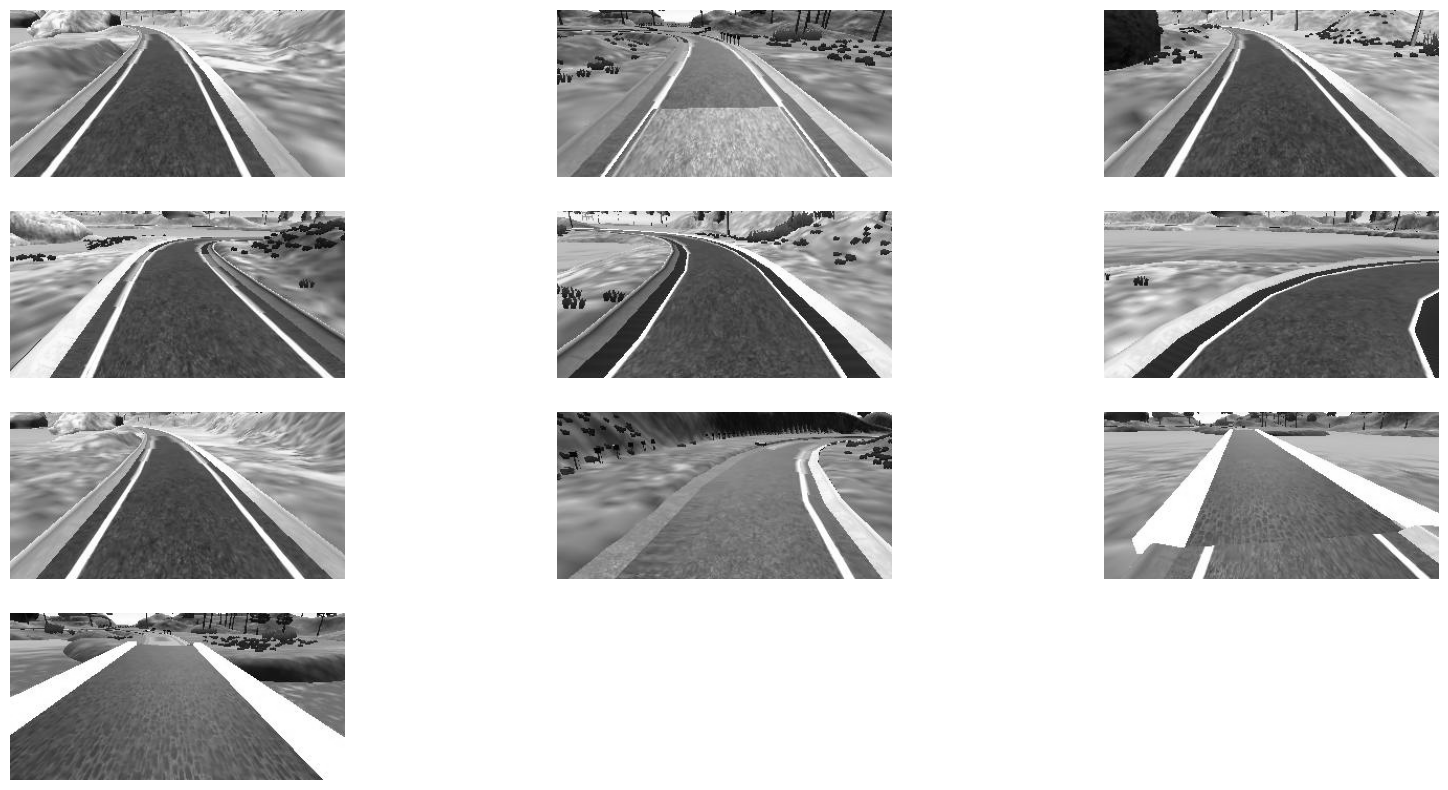

In [56]:
gray_img = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

# Hiển thị các ảnh xám này
show_images(gray_img)

Áp dụng Gaussian Blur để làm mờ ảnh

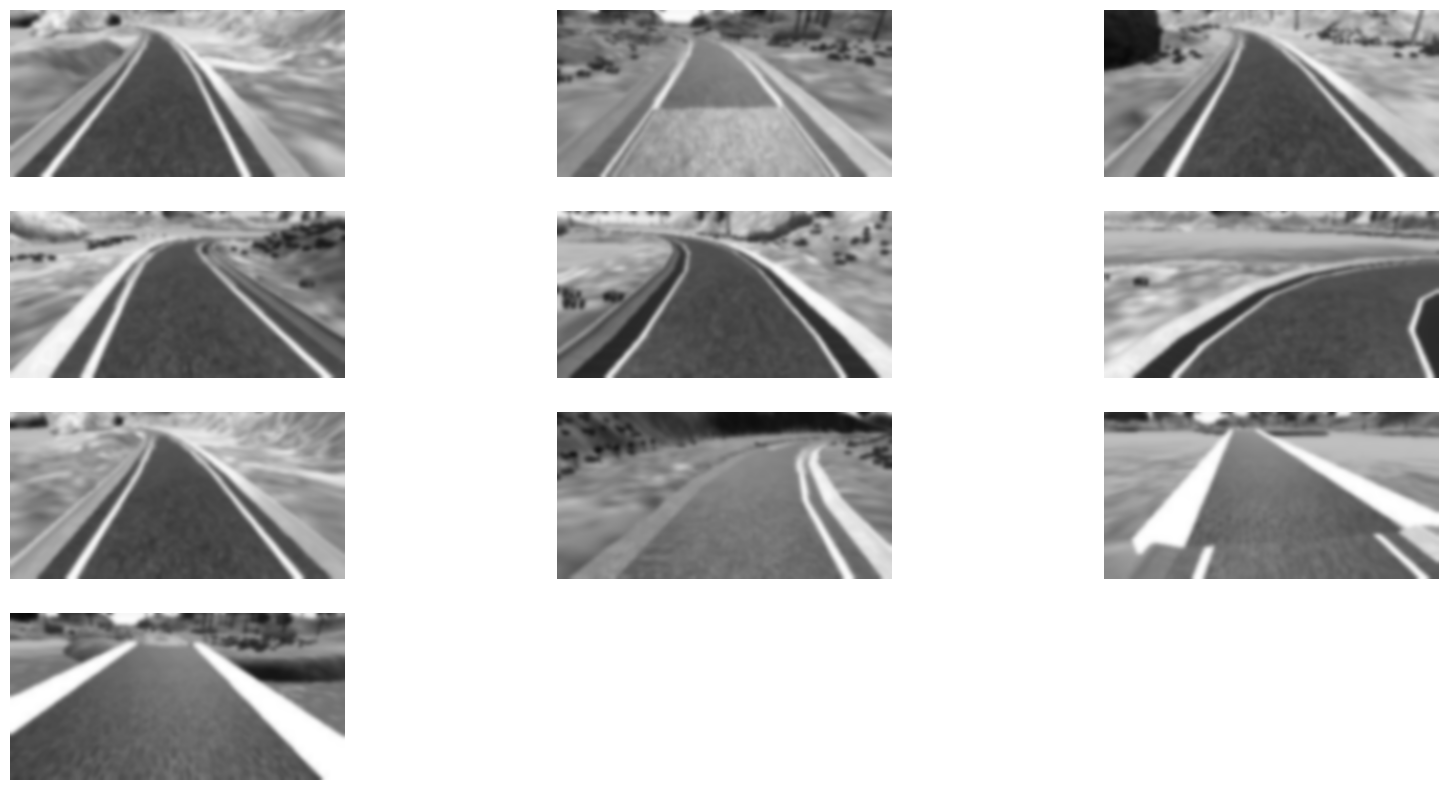

In [69]:
# Áp dụng Gaussian Blur cho mỗi ảnh xám trong danh sách
# Sử dụng kener 11x11
blurred_img = [cv2.GaussianBlur(img, (11, 11), 0) if img is not None else None for img in gray_img]

# Hiển thị ảnh đã làm mờ đầu tiên trong danh sách
show_images(blurred_img)

Áp dụng Canny cho mỗi ảnh

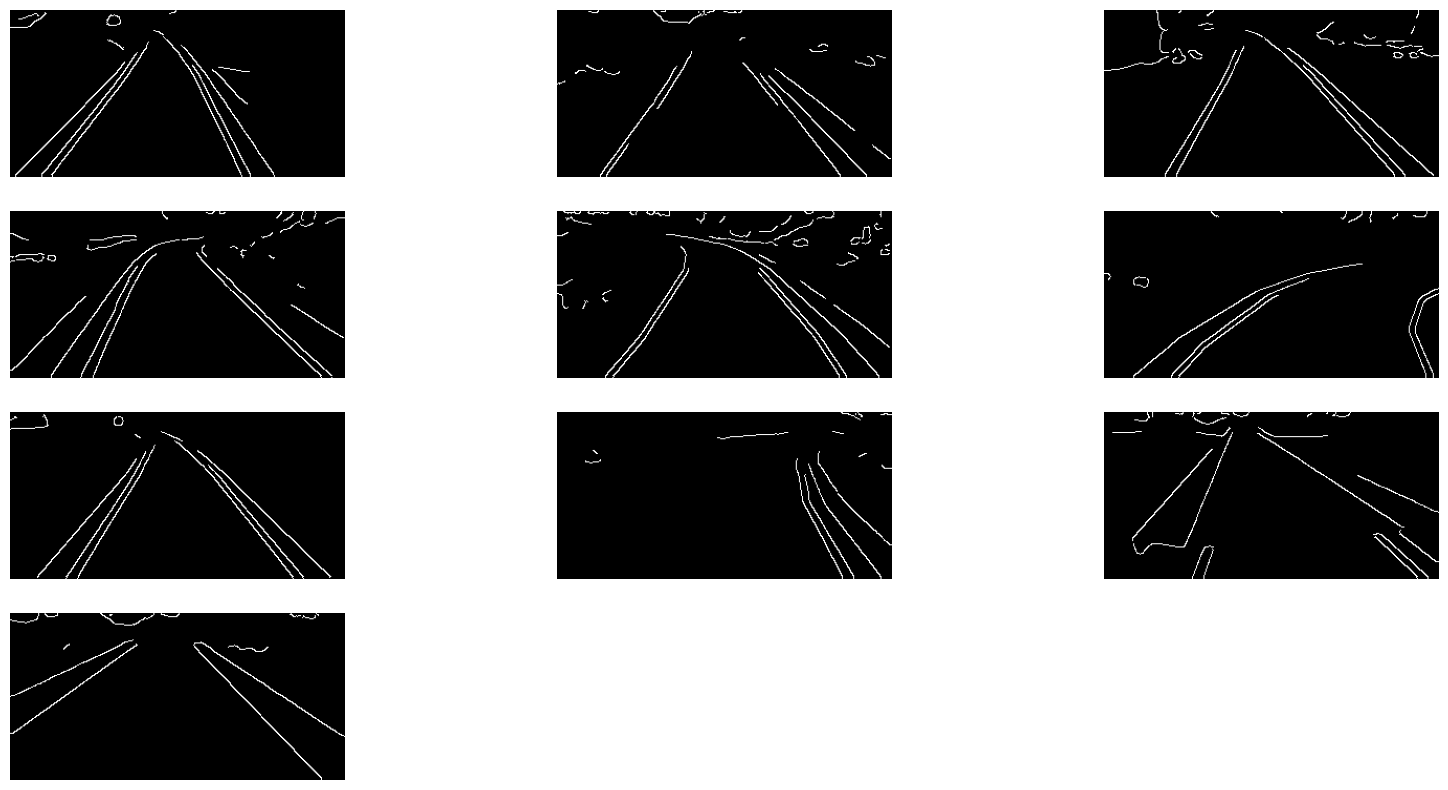

In [70]:
# Áp dụng Canny cho mỗi ảnh
thresh_low = 150
thresh_high = 200
img_canny = [cv2.Canny(img, thresh_low, thresh_high) if img is not None else None for img in blurred_img]
show_images(img_canny)

Tạo hàm tiền lý ảnh

In [71]:
def img_preprocess(images):
    if not images:
        raise ValueError("No images to process")

    preprocessed_images = []
    for img in images:

        # Chuyển thành màu xám
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Áp dụng Gaussian Blur để làm mờ ảnh, giúp giảm nhiễu và chi tiết không cần thiết
        blurred_img = cv2.GaussianBlur(gray_img, (11, 11), 0)

        # Áp dung Canny
        thresh_low = 150
        thresh_high = 200
        canny_img = cv2.Canny(blurred_img, thresh_low, thresh_high)

        # Áp dụng vào danh sách 
        preprocessed_images.append(canny_img)

    return preprocessed_images

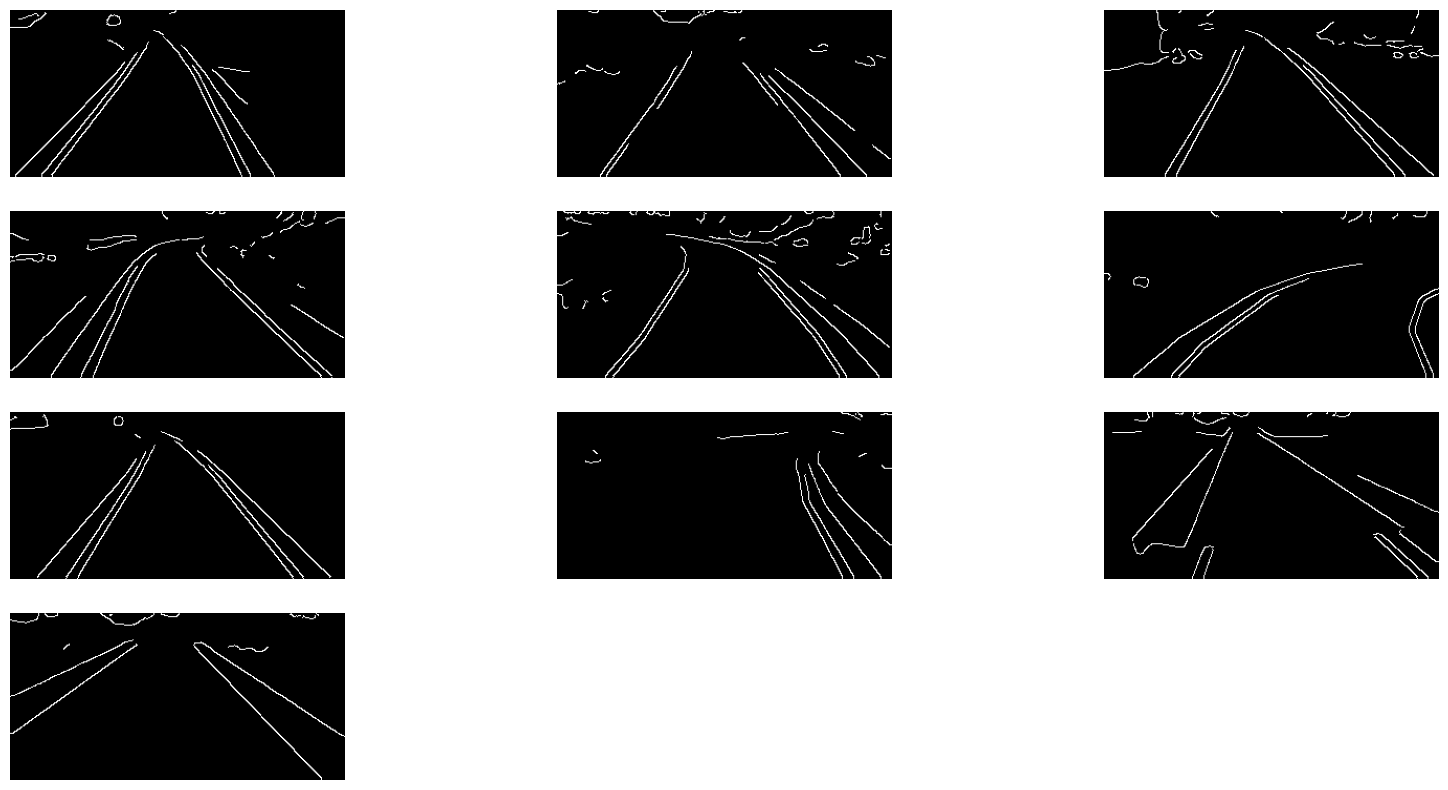

In [74]:
preprocessed_images = img_preprocess(images)

# Hiển thị ảnh
show_images(preprocessed_images)

Biến đổi góc nhìn birdview

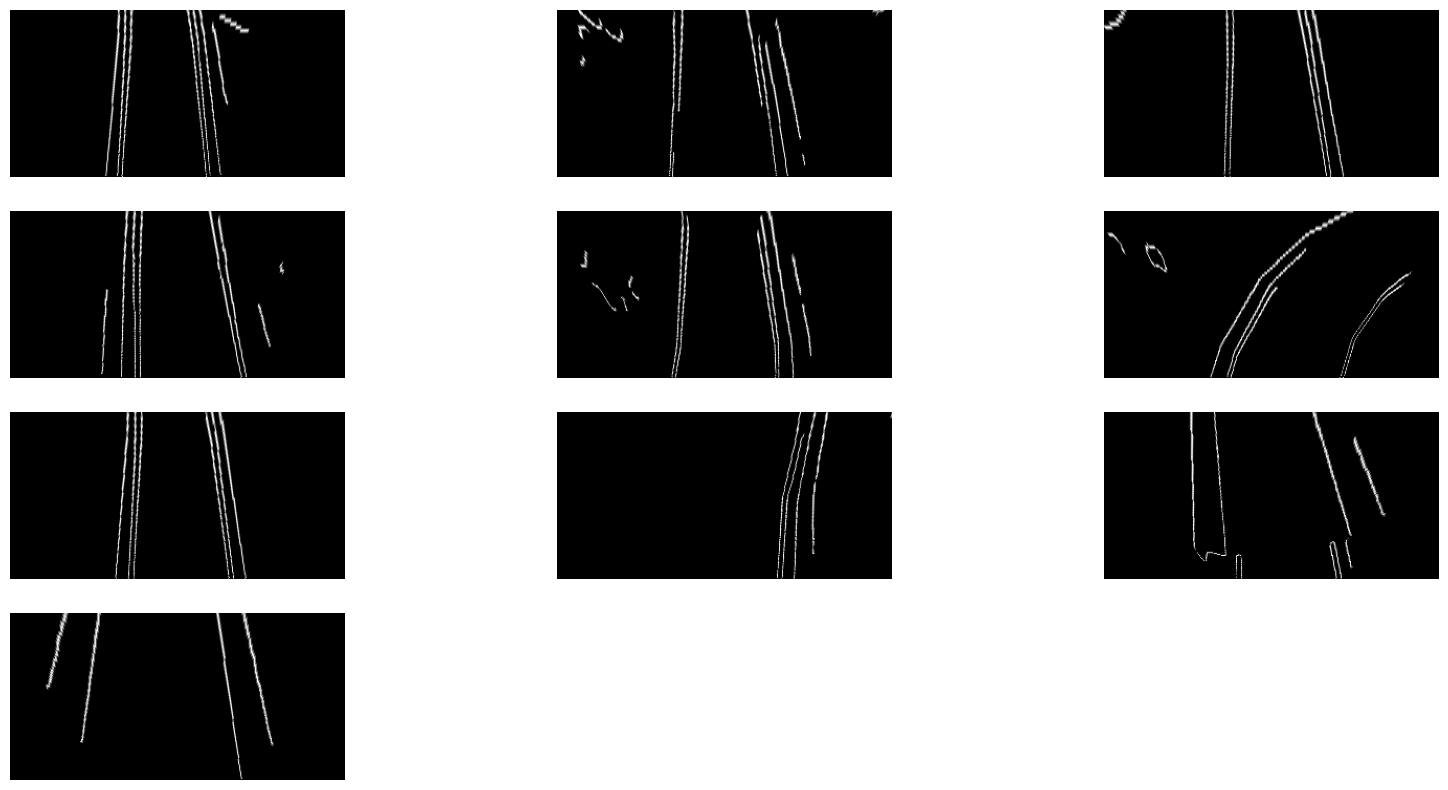

In [75]:
def birdview_transform(img):
    IMAGE_H = 160
    IMAGE_W = 320

    # 4 điểm ảnh tương trên ảnh gốc
    src = np.float32([[0, IMAGE_H], [320, IMAGE_H], [0, IMAGE_H//3], [IMAGE_W, IMAGE_H//3]])

    # 4 điểm ảnh tương ứng trên ảnh biến đổi (góc nhìn từ trên xuống)
    dst = np.float32([[90, IMAGE_H], [230, IMAGE_H], [-10, 0], [IMAGE_W+10, 0]])

    M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
    warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping

    return warped_img

# Áp dụng các biến đổi birdview với hình ảnh kết quả của bộ lọc Canny
birdview_images = [birdview_transform(img) for img in preprocessed_images]

# Hiển thị hình ảnh bird's-eye view
show_images(birdview_images)


Xây dựng thuật toán phát hiện vạch kẻ đường

Tạo hàm để tìm điểm trái phải

In [76]:
def find_left_right_points(image, draw=False):

    im_height, im_width = image.shape[:2]
    if draw: viz_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Vạch kẻ sử dụng để xác định tâm đường
    interested_line_y = int(im_height * 0.7)
    if draw: cv2.line(viz_img, (0, interested_line_y), (im_width, interested_line_y), (0, 0, 255), 2) 
    interested_line = image[interested_line_y, :]

    # Xác định điểm bên trái và bên phải
    left_point = -1
    right_point = -1
    lane_width = 100
    center = im_width // 2

    # Tìm điểm bên trái và bên phải bằng cách duyệt từ tâm ra
    for x in range(center, 0, -1):
        if interested_line[x] > 0:
            left_point = x
            break
    for x in range(center + 1, im_width):
        if interested_line[x] > 0:
            right_point = x
            break

    # Dự đoán điểm bên phải khi chỉ nhìn thấy điểm bên trái
    if left_point != -1 and right_point == -1:
        right_point = left_point + lane_width

    # Dự đoán điểm bên trái khi chỉ thấy điểm bên phải
    if right_point != -1 and left_point == -1:
        left_point = right_point - lane_width

    # Vẽ hai điểm trái / phải lên ảnh
    if draw: 
        if left_point != -1:
            viz_img = cv2.circle(viz_img, (left_point, interested_line_y), 7, (255,255,0), -1)
        if right_point != -1:
            viz_img = cv2.circle(viz_img, (right_point, interested_line_y), 7, (0,255,0), -1)

    return left_point, right_point, viz_img

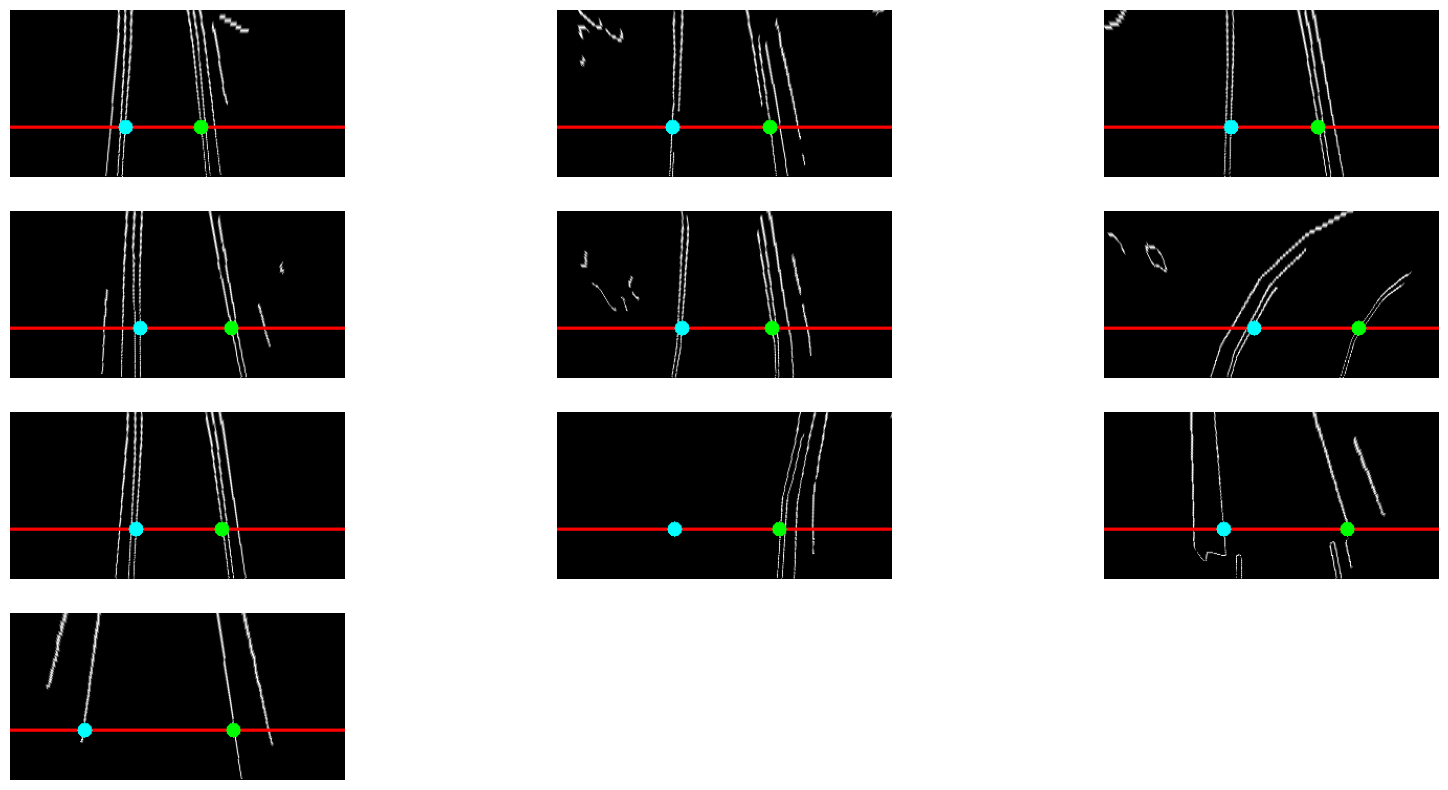

In [77]:
# Hiển thị điểm ảnh
viz_images = []
for img in birdview_images:
    left_point, right_point, viz_img = find_left_right_points(img, draw=True)
    viz_images.append(viz_img)

show_images(viz_images)

Tính toán góc lái và tốc độ

In [78]:
def calculate_control_signal(img):

    # Xử lý ảnh đầu vào
    img_lines = img_preprocess(img)

    #Biến đổi góc nhìn birdview
    img_birdview = birdview_transform(img_lines)

    # Tìm kiếm điểm trái phải
    left_point, right_point, viz_img = find_left_right_points(img_birdview, draw=True)

    # Hiển thị kết quả
    cv2.imshow("Result", viz_img)
    cv2.waitKey(1)

    # Tính toán góc lái và tốc độ
    # Tốc độ được cố định ở mức 50% tốc độ tối đa
    # Tính toán tốc độ từ góc quay
    throttle = 0.5
    steering_angle = 0
    im_center = img.shape[1] // 2

    if left_point != -1 and right_point != -1:
        # Tính độ lệch
        center_point = (right_point + left_point) // 2
        center_diff =  im_center - center_point

        # Tính góc lái
        steering_angle = - float(center_diff * 0.01)

    return throttle, steering_angle